Dataset Loaded Successfully!
Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Columns:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Accuracy: 0.7532

Confusion Matrix:
 [[79 20]
 [18 37]]


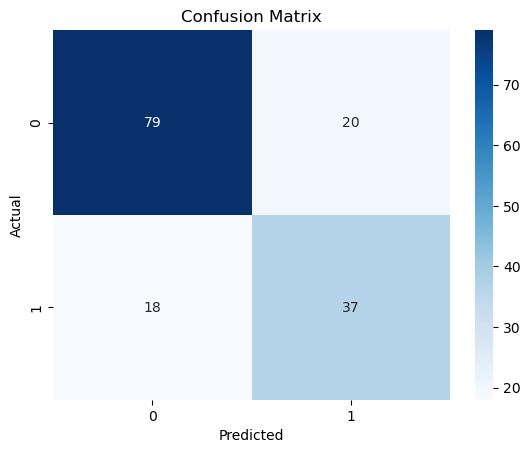


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



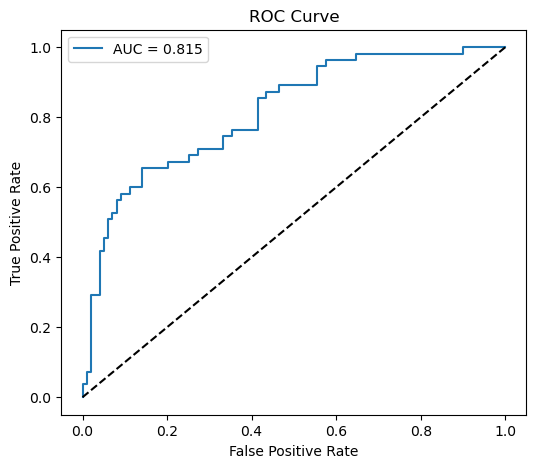


AUC Score: 0.815

Sample Input:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668            6       98             58             33      190  34.0   

     DiabetesPedigreeFunction  Age  
668                      0.43   43  
Predicted Outcome: 0
Probability of Diabetes: 0.277


In [1]:
# ==========================================
# PROGRAM: LOGISTIC REGRESSION MODEL
# DATA: diabetes (2).csv
# TASK:
#   - Load dataset
#   - Preprocess data
#   - Train Logistic Regression
#   - Evaluate model (Accuracy, Confusion Matrix, AUC)
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# ------------------ LOAD DATA ------------------
df = pd.read_csv(r"C:\Users\abhin\Downloads\diabetes (2).csv")

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)
display(df.head())

print("\nColumns:")
print(df.columns)


# ------------------ CHECK MISSING VALUES ------------------
print("\nMissing Values:")
print(df.isnull().sum())


# ------------------ DEFINE FEATURES & TARGET ------------------
X = df.drop("Outcome", axis=1)   # independent variables
y = df["Outcome"]                # target variable


# ------------------ TRAIN/TEST SPLIT ------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# ------------------ FEATURE SCALING ------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ------------------ TRAIN LOGISTIC REGRESSION MODEL ------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


# ------------------ PREDICTIONS ------------------
y_pred = model.predict(X_test_scaled)


# ------------------ ACCURACY ------------------
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", round(accuracy, 4))


# ------------------ CONFUSION MATRIX ------------------
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ------------------ CLASSIFICATION REPORT ------------------
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# ------------------ ROC CURVE + AUC ------------------
y_prob = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="AUC = {:.3f}".format(roc_auc))
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

print("\nAUC Score:", round(roc_auc, 3))


# ------------------ SAMPLE PREDICTION ------------------
sample = X_test.iloc[0:1]
sample_scaled = scaler.transform(sample)

print("\nSample Input:")
print(sample)

print("Predicted Outcome:", model.predict(sample_scaled)[0])
print("Probability of Diabetes:", round(model.predict_proba(sample_scaled)[0][1], 3))
